Introduction to Histograms:
As it pertains to images, a histogram is a graphical representation showing how frequently various colour values occur in the image.If your project involves detecting colour changes between images, histograms will prove to be very useful, and histograms are also quite handy as a preparatory step before performing thresholding.

'\nWe create the plot with plt.figure(), then label the figure and the coordinate axes with \nplt.title(), plt.xlabel(), and plt.ylabel() functions. The last step in the preparation of the figure is \nto set the limits on the values on the x-axis with the plt.xlim([0.0, 1.0]) function call.\n'

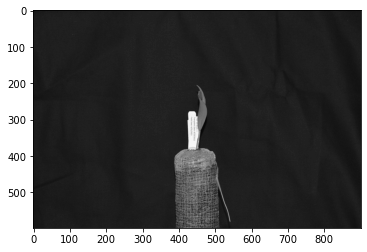

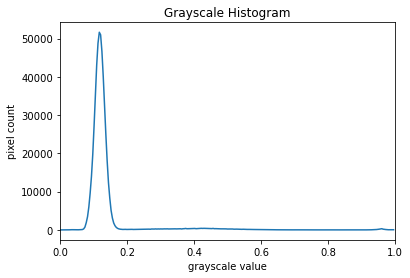

In [5]:
#GRAYSCALE HISTOGRAMS
#working with grayscale images
import numpy as np
import skimage.color
import skimage.io
import matplotlib.pyplot as plt

# read the image of a plant seedling as grayscale from the outset
#  the skimage.io.imread() function to load our image. 
# The first parameter to skimage.io.imread() is the filename of the image. 
# The second parameter as_gray instructs the function to transform the image into grayscale with a value 
# range from 0 to 1 while loading the image. (working with images in the value range 0 to 1)
# we can transform an image back to the range 0 to 255 with the function skimage.util.img_as_ubyte.

image = skimage.io.imread(fname=r"C:/Users/DEEP/Machine Learning/images/plant-seedling.jpg", as_gray=True)
# display the image
fig, ax = plt.subplots()
plt.imshow(image, cmap="gray")
# create the histogram
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))
# alternate
# histogram, bin_edges = plt.hist(image.flatten(), bins=256, range=(0, 1))
'''
The parameter bins determines the number of “bins” to use for the histogram. We pass in 256 because we want 
to see the pixel count for each of the 256 possible values in the grayscale image.
The parameter range is the range of values each of the pixels in the image can have. Here, we pass 
0 and 1, which is the value range of our input image after transforming it to grayscale.
The first output of the np.histogram function is a one-dimensional NumPy array, with 256 rows and one 
column, representing the number of pixels with the intensity value corresponding to the index. I.e., 
the first number in the array is the number of pixels found with intensity value 0, and the final number 
in the array is the number of pixels found with intensity value 255. The second output of np.histogram is 
an array with the bin edges and one column and 257 rows (one more than the histogram itself). There are no 
gaps between the bins, which means that the end of the first bin, is the start of the second and so on. 
For the last bin, the array also has to contain the stop, so it has one more element, than the histogram. 
'''

# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here
plt.plot(bin_edges[0:-1], histogram)  # <- or here
'''
We create the plot with plt.figure(), then label the figure and the coordinate axes with 
plt.title(), plt.xlabel(), and plt.ylabel() functions. The last step in the preparation of the figure is 
to set the limits on the values on the x-axis with the plt.xlim([0.0, 1.0]) function call.
'''

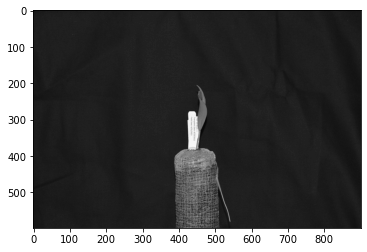

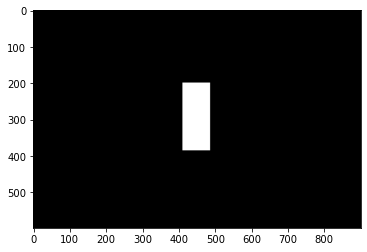

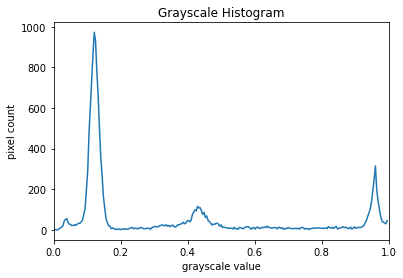

In [6]:
#Using a mask for a histogram
'''
Looking at the histogram above, you will notice that there is a large number of very dark pixels, as 
indicated in the chart by the spike around the grayscale value 0.12. That is not so surprising, since the 
original image is mostly black background. What if we want to focus more closely on the leaf of the 
seedling? That is where a mask enters the picture!
First, hover over the plant seedling image with your mouse to determine the (x, y) coordinates of a 
bounding box around the leaf of the seedling. Then, using techniques from the Drawing and Bitwise 
Operations episode, create a mask with a white rectangle covering that bounding box.
After you have created the mask, apply it to the input image before passing it to the np.histogram function
'''

import numpy as np
import skimage.draw
import skimage.color
import skimage.io
import matplotlib.pyplot as plt
# read the image as grayscale from the outset
image = skimage.io.imread(fname=r"C:/Users/DEEP/Machine Learning/images/plant-seedling.jpg", as_gray=True)

# display the image
fig, ax = plt.subplots()
plt.imshow(image, cmap="gray")

# create mask here, using np.zeros() and skimage.draw.rectangle()
mask = np.zeros(shape=image.shape, dtype="bool")
rr, cc = skimage.draw.rectangle(start=(199, 410), end=(384, 485))
mask[rr, cc] = True

# display the mask
fig, ax = plt.subplots()
plt.imshow(mask, cmap="gray")

# mask the image and create the new histogram
histogram, bin_edges = np.histogram(image[mask], bins=256, range=(0.0, 1.0))

# configure and draw the histogram figure
plt.figure()

plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram)


'\nIn our colour histogram program, we are using a tuple, (channel_id, c), as the for variable. The first \ntime through the loop, the channel_id variable takes the value 0, referring to the position of the red \ncolour channel, and the c variable contains the string "red". The second time through the loop the values \nare the green channels position and "green", and the third time they are the blue \nchannel position and "blue".\nInside the for loop, our code looks much like it did for the grayscale example. We calculate the histogram \nfor the current channel with the\nhistogram, bin_edges = np.histogram(image[:, :, channel_id], bins=256, range=(0, 256))\nfunction call, and then add a histogram line of the correct colour to the plot with the\nplt.plot(bin_edges[0:-1], histogram, color=c)\nfunction call. Note the use of our loop variables, channel_id and c.\nFinally we label our axes and display the histogram, shown here:\n'

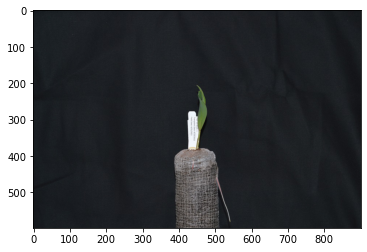

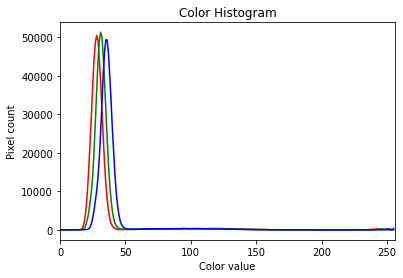

In [4]:
#COLOR HISTOGRAMS
import numpy as np
import skimage.draw
import skimage.color
import skimage.io
import matplotlib.pyplot as plt
# read the image as grayscale from the outset
image = skimage.io.imread(fname=r"C:/Users/DEEP/Machine Learning/images/plant-seedling.jpg")
# display the image
fig, ax = plt.subplots()
plt.imshow(image)

'''
 we create the histogram, by calling the np.histogram function three times, once for each of the channels. 
 We obtain the individual channels, by slicing the image along the last axis. For example, we can obtain 
 the red colour channel by calling r_chan = image[:, :, 0].
'''
# tuple to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)
# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges=np.histogram(image[:, :, channel_id], bins=256, range=(0, 256))
    plt.plot(bin_edges[0:-1], histogram, color=c)
#We will draw the histogram line for each channel in a different colour, and so we create a tuple of the 
#colours to use for the three lines with the

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

'''
The Python built-in zip() function takes a series of one or more lists and returns an iterator of tuples, 
where the first tuple contains the first element of each of the lists, the second contains the second 
element of each of the lists, and so on. In Python, an iterator, or an iterable object, is something that 
can be iterated over with the for control structure. A tuple is a sequence of objects, just like a list. 
However, a tuple cannot be changed, and a tuple is indicated by parentheses instead of square brackets. 
The zip() function takes one or more iterable objects, and returns an iterator of tuples consisting of the 
corresponding ordinal objects from each parameter
'''

'''
In our colour histogram program, we are using a tuple, (channel_id, c), as the for variable. The first 
time through the loop, the channel_id variable takes the value 0, referring to the position of the red 
colour channel, and the c variable contains the string "red". The second time through the loop the values 
are the green channels position and "green", and the third time they are the blue 
channel position and "blue".
Inside the for loop, our code looks much like it did for the grayscale example. We calculate the histogram 
for the current channel with the
histogram, bin_edges = np.histogram(image[:, :, channel_id], bins=256, range=(0, 256))
function call, and then add a histogram line of the correct colour to the plot with the
plt.plot(bin_edges[0:-1], histogram, color=c)
function call. Note the use of our loop variables, channel_id and c.
Finally we label our axes and display the histogram, shown here:
'''

Text(0, 0.5, 'pixel count')

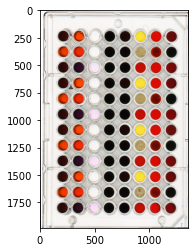

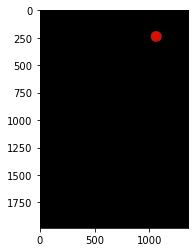

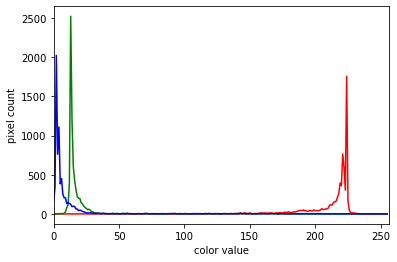

In [9]:
#color histogram with mask
image=skimage.io.imread(fname=r"C:/Users/DEEP/Machine Learning/images/wellplate-02.jpg")
fig, ax=plt.subplots()
plt.imshow(image)
'''
Suppose we are interested in the colour histogram of one of the sensors in the well plate image, 
specifically, the seventh well from the left in the topmost row, which shows Erythrosin B reacting with 
water. Hover over the image with your mouse to find the centre of that well and the radius (in pixels) of 
the well. Then create a circular mask to select only the desired well. Then, use that mask to apply the 
colour histogram operation to that well.
'''
#create a circular mask to select the 7th well in the 1st row
mask=np.zeros(shape=image.shape[0:2],dtype="bool")
circle=skimage.draw.disk(center=(240,1053),radius=49,shape=image.shape[0:2])
mask[circle]=1
#juust for display, make a copy of the image, call it masked_image
#use np.logical_not() and indexing to apply the mask to it
masked_img=image[:]
masked_img[np.logical_not(mask)]=0
#create a new fig and display the masked_img to verify the validity of the mask
fig, ax=plt.subplots()
plt.imshow(masked_img)
#list to select colors of each channel line
colors=("red","green","blue")
channel_ids=(0,1,2)
#creating the hidtogram plot, with 3 lines, 1 for each color
plt.figure()
plt.xlim([0,256])
for (channel_id,c) in zip(channel_ids,colors):
    #use the circular mask to apply to the histogram operation to the 7nth well of the 1st row
    histogram, bin_edges=np.histogram(image[:,:,channel_id][mask],bins=256,range=(0,256))
    plt.plot(histogram,color=c)
plt.xlabel("color value")
plt.ylabel("pixel count")